In [85]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pymc

In [86]:
import arviz

In [4]:
#np.random.seed(0)

Generative Linear Model

In [5]:
alpha = 0.5 # 0 height, 0 weight
beta  = 0.5
sigma = 5
n_individuals = 100
H = np.random.randint(low=130, high=171, size = (n_individuals,))
mu = alpha + beta * H
W = np.random.normal(loc=mu, scale=sigma, size=(n_individuals,))

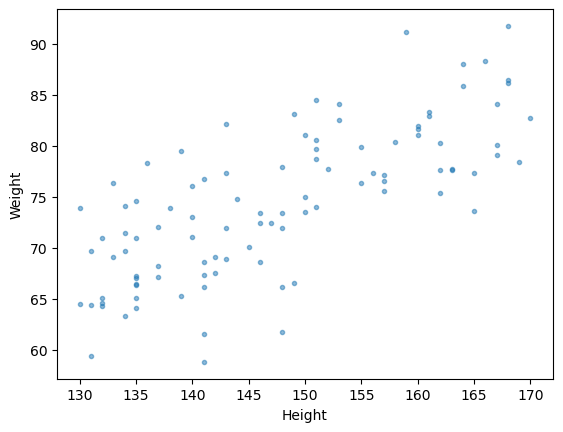

In [6]:
plt.plot(H, W, '.', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Sampling intercepts and slope from priors

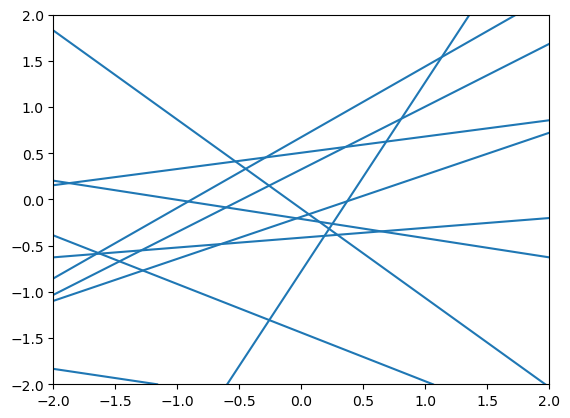

-0.9653117657400975

In [7]:
n_samples = 10
alpha = np.random.normal(loc=0, scale=1, size=n_samples)
beta  = np.random.normal(loc=0, scale=1, size=n_samples)
fig, ax = plt.subplots()

for alpha, beta in zip(alpha,beta):
    
    ax.axline(xy1 = (0,alpha), slope = beta)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()
beta

Rescaling

In [8]:
Hr = H - np.mean(H)

Statistical model for H -> W

In [9]:
n_samples = 10
alpha = stats.norm.rvs(loc=60, scale=10,size=n_samples)
beta  = stats.lognorm.rvs(loc=0,scale=np.exp(0),s=1,size=n_samples) #log norm is constrained positive, want a positive gradient cos of heights/weight relationship
sigma = stats.uniform.rvs(loc=0,scale=10,size= n_samples)
Hseq  = np.linspace(130,170,30)
Hbar = 150

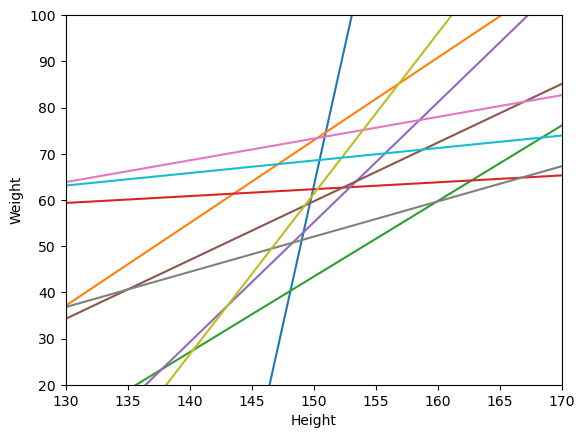

In [10]:
fig, ax = plt.subplots()

for i in range(n_samples):
    
    ax.plot(Hseq ,alpha[i] + beta[i] * (Hseq-Hbar))
plt.xlim((130,170))
plt.ylim((20,100))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Justify the structure of the model, using information outside of the sample/model. Use scientific expertise. 

In [11]:
alpha = 70 #intercept
beta = 0.5 #slope
sigma = 5 #standard deviation
n_individuals = 100
H = np.random.randint(low=130,high=171, size=n_individuals)
mu = alpha + beta*(H-np.mean(H))
W = np.random.normal(loc=mu, scale=sigma, size=n_individuals)

In [ ]:
m_validate = 